In [ ]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
  return datetime.strptime(x, '%Y-%m')

In [ ]:
example = parser('1995-01')

example

datetime.datetime(1995, 1, 1, 0, 0)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Datasets/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

In [ ]:
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [ ]:
data.describe()

,Sales
count,108.000000
mean,14595.111111
std,4525.213913
min,5568.000000
25%,11391.250000
50%,14076.000000
75%,17595.750000
max,26099.000000


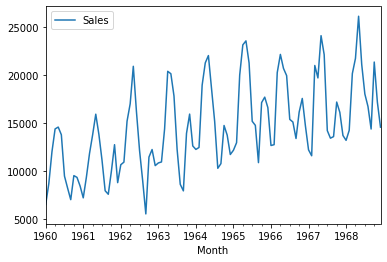

In [ ]:
data.plot()
plt.show()

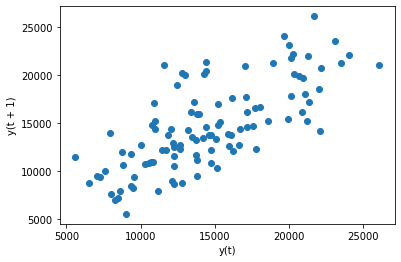

In [ ]:
from pandas.plotting import lag_plot

lag_plot(data)
plt.show()

Apakah ini problem regression ?

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [data.index[i].month for i in range(len(data))]
dataframe['sales'] = data['Sales'].values
print(dataframe.head(5))

   month  sales
0      1   6550
1      2   8728
2      3  12026
3      4  14395
4      5  14587


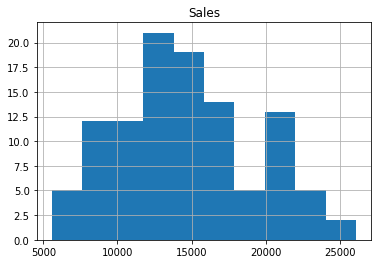

In [ ]:
data.hist()
plt.show()

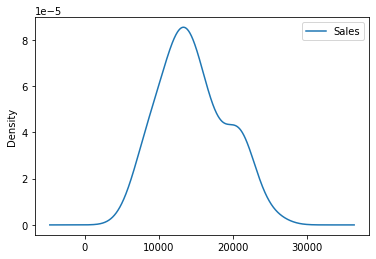

In [ ]:
data.plot(kind='kde')
plt.show()

Box Plot

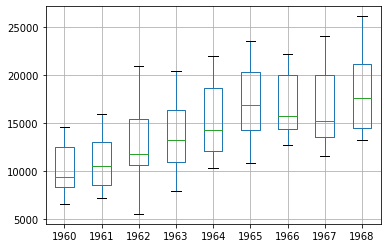

In [ ]:
groups = data.groupby(pd.Grouper(freq='A'))
print(groups)
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.flatten()
years.boxplot()
plt.show()

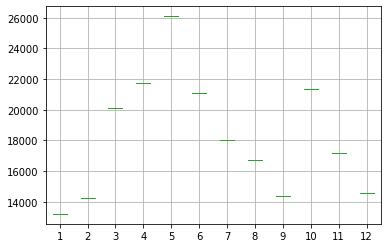

In [ ]:
one_year = data['1968']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)

months.columns = range(1, 13)
months.boxplot()
plt.show()

In [ ]:
values = data.values
values = values.astype('float32')

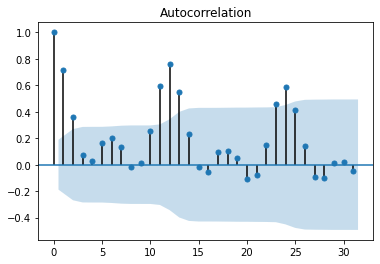

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags=31, ax=plt.gca())
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_size = int(len(values) * 0.80)
train, test = values[0:train_size], values[train_size:]

Auto Regression

In [ ]:
values = data.values
train, test = values[:len(values)-7], values[len(values)-7:]

print(len(values))
print(values)
print(len(values[1:len(values)-7]))
print(len(values[len(values)-7:]))

108
[[ 6550]
 [ 8728]
 [12026]
 [14395]
 [14587]
 [13791]
 [ 9498]
 [ 8251]
 [ 7049]
 [ 9545]
 [ 9364]
 [ 8456]
 [ 7237]
 [ 9374]
 [11837]
 [13784]
 [15926]
 [13821]
 [11143]
 [ 7975]
 [ 7610]
 [10015]
 [12759]
 [ 8816]
 [10677]
 [10947]
 [15200]
 [17010]
 [20900]
 [16205]
 [12143]
 [ 8997]
 [ 5568]
 [11474]
 [12256]
 [10583]
 [10862]
 [10965]
 [14405]
 [20379]
 [20128]
 [17816]
 [12268]
 [ 8642]
 [ 7962]
 [13932]
 [15936]
 [12628]
 [12267]
 [12470]
 [18944]
 [21259]
 [22015]
 [18581]
 [15175]
 [10306]
 [10792]
 [14752]
 [13754]
 [11738]
 [12181]
 [12965]
 [19990]
 [23125]
 [23541]
 [21247]
 [15189]
 [14767]
 [10895]
 [17130]
 [17697]
 [16611]
 [12674]
 [12760]
 [20249]
 [22135]
 [20677]
 [19933]
 [15388]
 [15113]
 [13401]
 [16135]
 [17562]
 [14720]
 [12225]
 [11608]
 [20985]
 [19692]
 [24081]
 [22114]
 [14220]
 [13434]
 [13598]
 [17187]
 [16119]
 [13713]
 [13210]
 [14251]
 [20139]
 [21725]
 [26099]
 [21084]
 [18024]
 [16722]
 [14385]
 [21342]
 [17180]
 [14577]]
100
7


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)
print('Coefficients:', model_fit.params)

Lag: 12
Coefficients: [ 2.43651673e+03  2.03381611e-01  7.78333271e-02 -9.70823639e-02
 -8.06346614e-02  1.21767303e-01 -7.47060655e-02  5.66190719e-02
 -8.47415409e-02 -2.42168681e-02 -5.05744909e-02  2.80738854e-01
  5.53052959e-01]


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
  rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

predicted=21585.128852, expected=21084.000000
predicted=15815.729963, expected=18024.000000
predicted=14008.784812, expected=16722.000000
predicted=14343.126008, expected=14385.000000
predicted=17672.790457, expected=21342.000000
predicted=16465.186273, expected=17180.000000
predicted=14672.831550, expected=14577.000000
Test RMSE: 1944.741


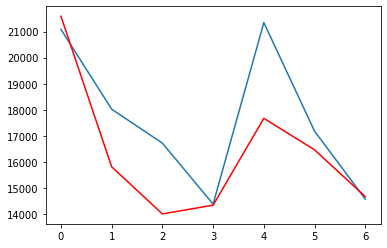

In [ ]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()

***No. 1 Plot dataset yang digunakan***

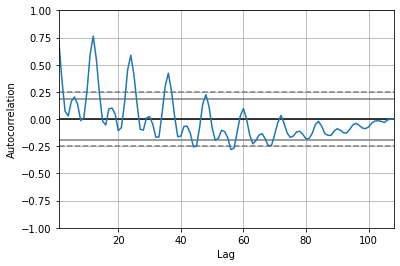

In [ ]:
pd.plotting.autocorrelation_plot(data)
plt.show()

Terdapat korelasi positif pada rentang angka 0-10, maka akan di coba dengan variable p = 2

***No.2***

Pada dataset sales, terdapat trend. Karena data tidak berbentuk stationary, dan grafik output menunjukan kecenderungan terhadap waktu

***No.3***

**ARIMA MODEL**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA 
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(data, order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1016.733
Method:                       css-mle   S.D. of innovations           3238.735
Date:                Thu, 17 Sep 2020   AIC                           2041.466
Time:                        04:04:44   BIC                           2052.157
Sample:                    02-01-1960   HQIC                          2045.800
                         - 12-01-1968                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            76.5216    324.843      0.236      0.814    -560.158     713.201
ar.L1.D.Sales     0.1764      0.096      1.845      0.068      -0.011       0.364
ar.L2.D.Sales    -0.1413      0.096     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


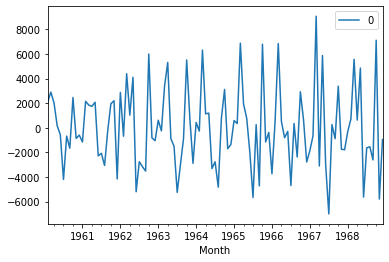

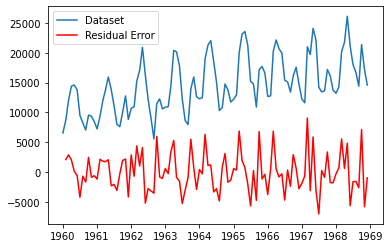

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(data)
plt.plot(residuals, color='red')
plt.legend(['Dataset', 'Residual Error'])

In [ ]:
residuals

,0
Month,
1960-02-01,2101.478425
1960-03-01,2896.654509
1960-04-01,2021.045329
1960-05-01,166.129828
1960-06-01,-569.067200
...,...
1968-08-01,-1544.435068
1968-09-01,-2613.397077
1968-10-01,7111.507128


In [ ]:
print(residuals.describe())

                 0
count   107.000000
mean      3.694041
std    3254.493956
min   -7000.877106
25%   -2038.157156
50%    -303.267287
75%    1940.369505
max    9059.576217


Rolling Forecast ARIMA Model (Predictions)

In [ ]:
values = data.values
size = int(len(values)* 0.80)
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  prediction = output[0]
  predictions.append(prediction)
  expected = test[t]
  history.append(expected)
  print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=11989.999319, expected=20985.000000
predicted=24143.379985, expected=19692.000000
predicted=17422.787867, expected=24081.000000
predicted=25463.326627, expected=22114.000000
predicted=21245.462669, expected=14220.000000
predicted=12777.364854, expected=13434.000000
predicted=14705.647789, expected=13598.000000
predicted=13834.175165, expected=17187.000000
predicted=18091.339788, expected=16119.000000
predicted=15368.133087, expected=13713.000000
predicted=13420.550945, expected=13210.000000
predicted=13577.816778, expected=14251.000000
predicted=14646.889108, expected=20139.000000
predicted=21451.251286, expected=21725.000000
predicted=21176.705157, expected=26099.000000
predicted=27067.722996, expected=21084.000000
predicted=19460.218739, expected=18024.000000
predicted=18270.360372, expected=16722.000000
predicted=16999.048307, expected=14385.000000
predicted=14116.589721, expected=21342.000000
predicted=23311.833482, expected=17180.000000
predicted=15614.275620, expected=1

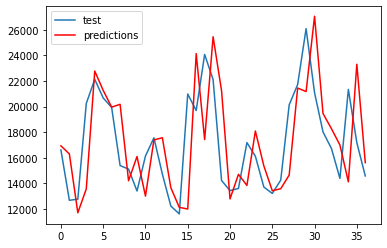

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test', 'predictions'])

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.80)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

  # evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=28195232.967
ARIMA(0, 0, 1) MSE=17145492.120
ARIMA(0, 1, 0) MSE=16861609.466
ARIMA(0, 1, 1) MSE=18339183.147
ARIMA(0, 1, 2) MSE=18918102.089
ARIMA(0, 2, 0) MSE=35488071.035
ARIMA(0, 2, 1) MSE=17453329.339
ARIMA(0, 2, 2) MSE=18936017.603
ARIMA(1, 0, 0) MSE=14646375.971
ARIMA(1, 0, 1) MSE=15400642.327
ARIMA(1, 0, 2) MSE=14395783.904
ARIMA(1, 1, 0) MSE=18139717.723
ARIMA(1, 2, 0) MSE=28656053.352
ARIMA(2, 0, 0) MSE=15687644.365
ARIMA(2, 0, 1) MSE=15670737.813
ARIMA(2, 0, 2) MSE=15826335.021
ARIMA(2, 1, 0) MSE=19004805.727
ARIMA(2, 2, 0) MSE=28801193.471
ARIMA(3, 0, 0) MSE=15634584.625
ARIMA(3, 0, 1) MSE=13471106.021
ARIMA(3, 1, 0) MSE=16305321.929
ARIMA(3, 2, 0) MSE=28949134.372
ARIMA(4, 0, 0) MSE=14949955.594
ARIMA(4, 0, 1) MSE=14224920.551
ARIMA(4, 1, 0) MSE=14169479.835
ARIMA(4, 2, 0) MSE=16506855.098
ARIMA(5, 0, 0) MSE=13843033.695
ARIMA(5, 0, 1) MSE=16166058.193
ARIMA(5, 1, 0) MSE=13176496.773
ARIMA(5, 2, 0) MSE=16454940.752
ARIMA(6, 0, 0) MSE=12206660.474
ARIMA(6,

In [ ]:
print('RMSE ARIMA(8,1,1) :', sqrt(5920975.187))

RMSE ARIMA(8,1,1) : 2433.305403561172


Hyperparameter terbaik untuk ARIMA (p=8, q=1, d=1).
p=8 maka legnya 8, d = 1 karena grafik tidak stationary artinya dibutuhkan 1 agar grafiknya menjadi stationary. q nilai parameter moving averagenya adalah 1.
Nilai RMSE ARIMA terbaik = 2433.305403561172

***No.4***

**SARIMA**

In [ ]:
data.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [ ]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# dataset = pd.read_csv('/content/drive/My Drive/Datasets/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 12

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(data.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 18608.652
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'n']] 9928.438
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'n']] 3798.000
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'n']] 7278.585
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 3942.265
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'n']] 3852.155
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'n']] 3924.991
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'n']] 3949.171
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 5399.238
 > Model[[(0, 0, 0), (0, 0, 1, 0), 'c']] 4061.377
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'n']] 3440.470
 > Model[[(0, 0, 0), (0, 0, 2, 0), 'c']] 4130.492
 > Model[[(0, 0, 0), (1, 0, 0, 0), 'c']] 3502.309
 > Model[[(0, 0, 0), (1, 0, 1, 0), 'c']] 3816.618
 > Model[[(0, 0, 0), (1, 0, 2, 0), 'c']] 3478.543
 > Model[[(0, 0, 0), (2, 0, 0, 0), 'c']] 4094.032
 > Model[[(0, 0, 0), (2, 0, 1, 0), 'c']] 3493.332
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 6760.052
 > Model[[(0, 0, 0), (2, 0, 2, 0), 'c']] 3378.390
 > Model[[(0, 0, 0), (0, 0, 1, 0), 't']] 4512.298

Nilai RMSE SARIMA Terbaik [(2, 1, 2), (2, 0, 2, 0), 'c'] : 2578.9128680665303
Dataset terdapat trend 'c' constant.
p=2 maka legnya 2, d = 1 karena grafik tidak stationary artinya dibutuhkan 1 agar grafiknya menjadi stationary. q nilai parameter moving averagenya adalah 2.

tapi mari kita gunakan nila p=8, karena di ketahui pada ARIMA, leg terbaik = 8

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [8]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 12

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(data.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(8, 0, 0), (0, 0, 0, 0), 'n']] 3114.561
 > Model[[(8, 0, 0), (0, 0, 1, 0), 'n']] 2973.082
 > Model[[(8, 0, 0), (0, 0, 2, 0), 'n']] 3544.996
 > Model[[(8, 0, 0), (1, 0, 0, 0), 'n']] 3219.493
 > Model[[(8, 0, 0), (1, 0, 1, 0), 'n']] 2541.962
 > Model[[(8, 0, 0), (1, 0, 2, 0), 'n']] 2913.530
 > Model[[(8, 0, 0), (2, 0, 0, 0), 'n']] 2536.992
 > Model[[(8, 0, 0), (2, 0, 1, 0), 'n']] 2537.647
 > Model[[(8, 0, 0), (0, 0, 0, 0), 'c']] 2995.621
 > Model[[(8, 0, 0), (2, 0, 2, 0), 'n']] 2105.405
 > Model[[(8, 0, 0), (0, 0, 1, 0), 'c']] 2885.238
 > Model[[(8, 0, 0), (0, 0, 2, 0), 'c']] 3039.762
 > Model[[(8, 0, 0), (1, 0, 0, 0), 'c']] 2656.485
 > Model[[(8, 0, 0), (1, 0, 1, 0), 'c']] 2628.655
 > Model[[(8, 0, 0), (1, 0, 2, 0), 'c']] 2114.321
 > Model[[(8, 0, 0), (2, 0, 0, 0), 'c']] 2564.946
 > Model[[(8, 0, 0), (2, 0, 1, 0), 'c']] 2545.954
 > Model[[(8, 0, 0), (0, 0, 0, 0), 't']] 3134.247
 > Model[[(8, 0, 0), (2, 0, 2, 0), 'c']] 1997.948
 > Model[[(8, 0, 0), (0, 0, 1, 0), 't']] 2974.125


Nilai RMSE SARIMA Terbaik [(8, 1, 1), (2, 0, 2, 0), 't'] = 1528.8114295261576.
Dataset terdapat trend 't' linear, hal ini terlihat pada grafik plot yang menurun, namun di beberapa titik terakhir mulai berubah keatas.
p=8 maka legnya 8, d = 1 karena grafik tidak stationary artinya dibutuhkan 1 agar grafiknya menjadi stationary. q nilai parameter moving averagenya adalah 1.


***No. 5***

Nilai RMSE ARIMA (p=8, q=1, d=1) terbaik : 2433.305403561172. 
Nilai RMSE SARIMA [(8, 1, 1), (2, 0, 2, 0), 't'] terbaik  : 1528.8114295261576

Dari dataset sales, disimpulkan nilai rmse sarima lebih baik dibandingkan arima. Hal ini disebabkan karena dataset sales, terdapat trend (linear) sehingga lebih cocok menggunakan algoritma SARIMA